In [1]:
import json
import numpy as np
from tqdm import tqdm
from csc.utils import *
from csc.atoms import *
from csc.dictionary import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.60
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.01
ymax = 0.034
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 1428 different atoms


In [2]:
path_to_db = '/home/gomes/synthetic-data/signals_db1.json'
path_to_db = 'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\signals_db1.json'
with open(path_to_db, 'r') as f:
    signals_dict_db = json.load(f)
    signals_db = signals_dict_db['signals']
print('The database has {} omp processed signals'.format(len(signals_db)))

The database has 15 omp processed signals


In [3]:
path_to_omp_db = '/home/gomes/synthetic-data/omp_db1.json'
path_to_omp_db = 'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\omp_pipeline_db1_2.json'
with open(path_to_omp_db, 'r') as f:
    db = json.load(f)
    omp_db = db['omp']
print('The database has {} omp processed signals'.format(len(omp_db)))

The database has 15 omp processed signals


In [4]:
worst_omp_idx = np.argmax([signal['mse'] for signal in omp_db])
worst_omp_dict = omp_db[worst_omp_idx]
print('The worst omp signal has a mse of {}'.format(omp_db[worst_omp_idx]['mse']))
print(worst_omp_dict)

The worst omp signal has a mse of 0.005003978654913523
{'id': 2, 'mse': 0.005003978654913523, 'sparsity': 5, 'approx': [-4.523130841065452e-18, -8.22387425648264e-18, -6.5790994051861115e-18, -5.893776550479225e-18, -5.345518266713716e-18, 7.401486830834375e-18, -4.797259982948207e-18, 6.304970263303358e-18, -1.610508708561184e-17, -6.9217608325395564e-18, -7.264422259892998e-18, 8.498003398365395e-18, 1.6447748512965283e-18, 1.2884069668489469e-17, -1.082810110436881e-17, -1.4254715377903246e-17, -3.2895497025930573e-18, -2.0422621070265226e-17, -1.041690739154468e-17, 6.647631690656801e-18, 1.905197536085145e-17, -4.797259982948204e-19, 6.304970263303359e-18, 5.6196474085964715e-18, 2.4226162913888445e-17, 7.864079757761525e-18, 1.8041124150158794e-17, 1.960023364461696e-17, 1.0930899532574844e-17, 1.8537983219821285e-17, 1.5077102803551508e-17, 2.8783559897689254e-18, 2.802970475751167e-17, 1.4700175233462722e-17, 2.0011427357441093e-17, -1.7818394222379045e-18, 1.658481308390666e-1

In [5]:
signal_dict = next((item for item in signals_db if item['id'] == worst_omp_dict['id']), None)
print(signal_dict)


{'id': 2, 'snr': -5, 'sparsity': 5, 'signal': [0.09292943122251726, -0.05138076204302752, 0.10031383036367197, 0.02949777409699966, 0.1035673480221753, 0.04372492343047301, 0.04833392368719783, 0.03518741771268435, -0.09528583910469406, -0.05839032294227661, 0.025127038012482835, -0.07959409377051435, 0.08355510605601336, 0.04165897064991798, -0.012552558561761074, 0.00023224024932149887, -0.009606222665042933, -0.06469966526383375, -0.11128886808311694, 0.007070261394879048, -0.07853758555910079, 0.09074486792579922, -0.012122336246149194, 0.04210548893160982, -0.030159709403547213, 0.029509772918637923, -0.07633074578048085, 0.0009803865819057764, -0.022482171083293832, -0.029561283465577744, -0.06341592743488683, -0.011779062683460207, 0.0032547041911793135, 0.0011360859815620042, -0.07666825201554665, -0.019205495084538934, 0.04394907685508358, 0.05718400997845414, 0.04418712735196317, -0.02074756351440006, 0.040557351231240435, 0.02441348349024408, -0.010449827620293523, 0.0354627

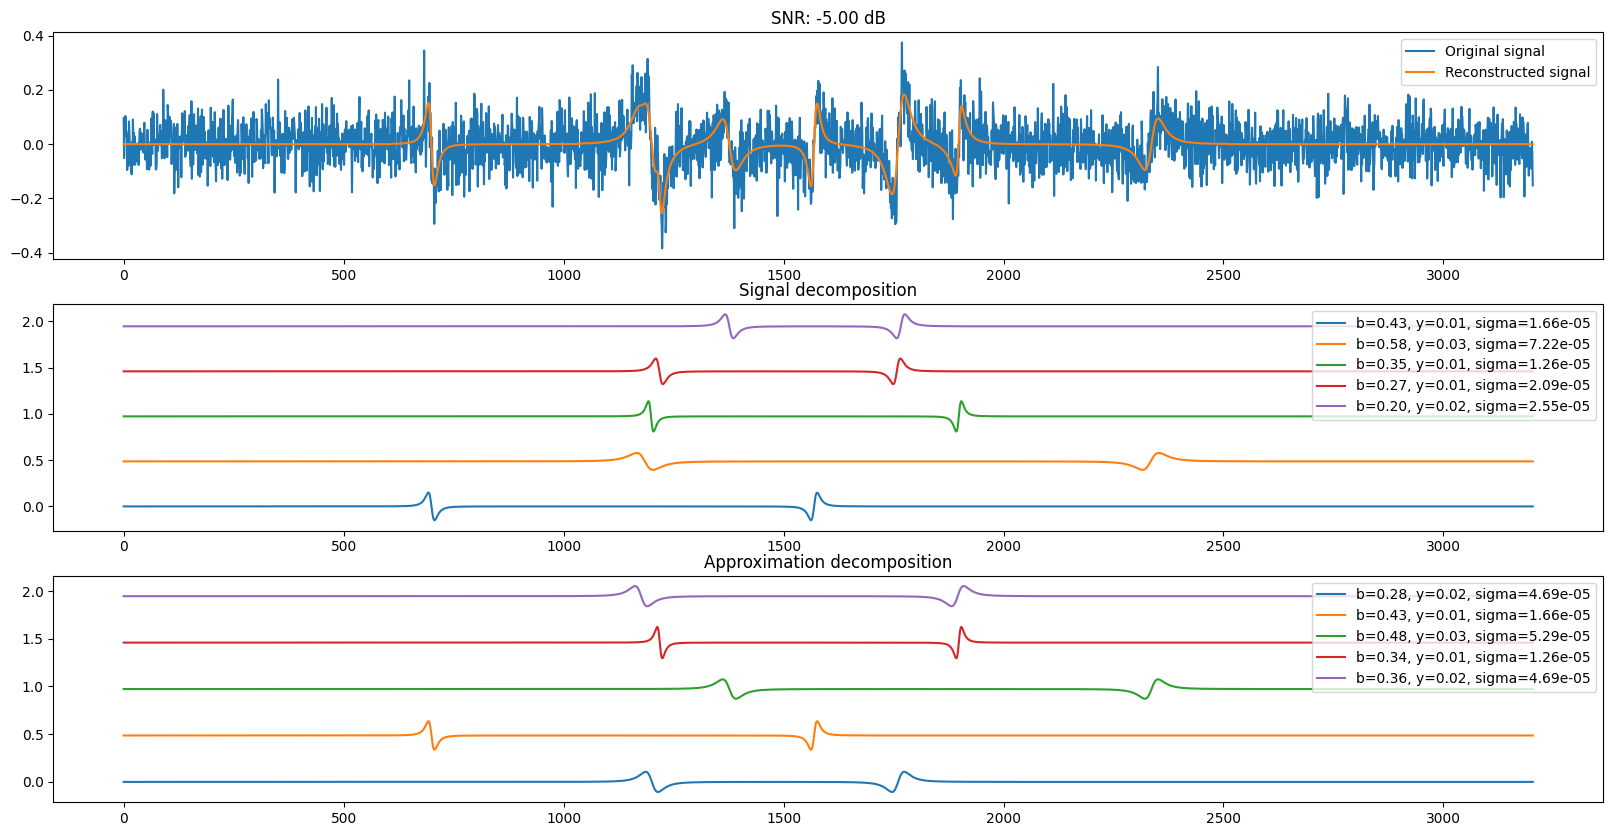

In [6]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10))

axs[0].plot(signal_dict['signal'], label='Original signal')
axs[0].plot(worst_omp_dict['approx'], label='Reconstructed signal')
axs[0].set_title('SNR: {:.2f} dB'.format(signal_dict['snr']))

signal_atoms = signal_dict['atoms']
approx_atoms = worst_omp_dict['atoms']

# Signal decomposition
offset = np.max(signal_dict['signal'])*1.3
for i, atom in enumerate(signal_atoms) :
    zs_atom = dictionary.getAtomFromParams(atom['b'], atom['y'], atom['s'])
    if zs_atom is not None :
        atom_in_signal = zs_atom.getAtomInSignal(len(signal_dict['signal']), atom['x'])
        axs[1].plot(atom_in_signal + offset*i, label=str(zs_atom))
axs[1].set_title('Signal decomposition')

# Approx decomposition
offset = np.max(signal_dict['signal'])*1.3
for i, atom in enumerate(approx_atoms) :
    zs_atom = dictionary.getAtomFromParams(atom['b'], atom['y'], atom['s'])
    if zs_atom is not None :
        atom_in_signal = zs_atom.getAtomInSignal(len(signal_dict['signal']), atom['x'])
        axs[2].plot(atom_in_signal + offset*i, label=str(zs_atom))
axs[2].set_title('Approximation decomposition')

axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()